<a href="https://colab.research.google.com/github/ViniciusPagote/Dashboard-Analise-Mercado/blob/main/Projeto_Analise-Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Pacotes

#Modelagem de dados
import pandas as pd
import numpy as np

#Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns

#Avisos
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Ler a Base de dados
Base_Dados = pd.read_excel('Base_Dados - Estudo Combustiveis.xlsx')
Base_Dados.shape

(118, 9)

In [9]:
Base_Dados.head()

,Ano,Mes,Data,Preco_Gasolina,Cotacao_Dolar,Acao_Petrobras,Preco_Baril,IPCA,Consumo_Energia(MWh)
0,2012,1,2012-01-31,2.775390,1.8701,25.400000,113.699997,6.22,36305167.29
1,2012,2,2012-02-29,2.769141,1.7448,25.600000,125.470001,5.85,36900531.02
2,2012,3,2012-03-31,2.770964,1.8234,25.299999,126.220001,5.24,38623110.72
3,2012,4,2012-04-30,2.769274,1.9058,23.230000,125.430000,5.10,37995869.09
4,2012,5,2012-05-31,2.766385,2.0873,21.400000,119.660004,4.99,36810191.03


In [11]:
Base_Dados.corr()['Preco_Gasolina']

Ano                     0.913069
Mes                     0.108296
Preco_Gasolina          1.000000
Cotacao_Dolar           0.857412
Acao_Petrobras          0.514711
Preco_Baril            -0.438293
IPCA                    0.034119
Consumo_Energia(MWh)    0.604336
Name: Preco_Gasolina, dtype: float64

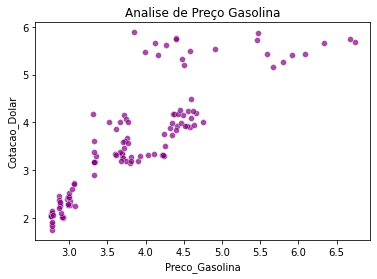

In [20]:
plt.title("Analise de Preço Gasolina")
sns.scatterplot(data=Base_Dados, x='Preco_Gasolina', y='Cotacao_Dolar', color='purple', alpha=0.7);

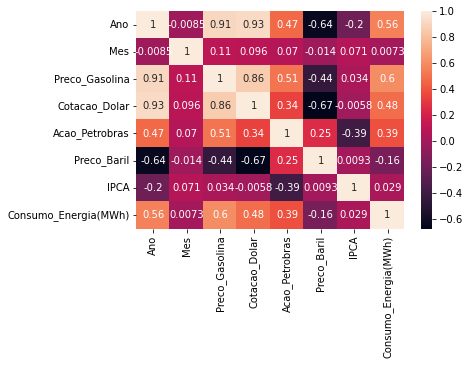

In [21]:
#Analise correlação grafica
Correlacao = Base_Dados.corr()
sns.heatmap( Correlacao, annot=True );

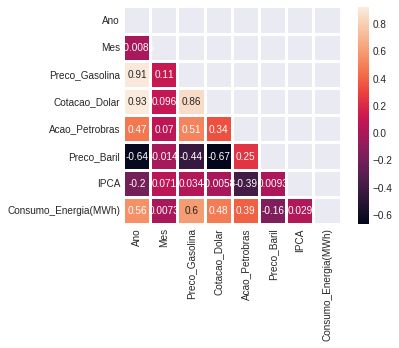

In [57]:
#Analise correlação grafica
Correlacao = Base_Dados.corr()

#Incluindo os valores em uma matriz
Mascara = np.zeros_like( Correlacao)

Mascara[np.triu_indices_from(Mascara)] = True

Grafico_Correlacao = sns.heatmap(Correlacao,mask = Mascara, square = True, annot = True, linecolor = '#fff', linewidths=2,
                                 cbar = True)

In [32]:
Base_Dados.columns

Index(['Ano', 'Mes', 'Data', 'Preco_Gasolina', 'Cotacao_Dolar',
       'Acao_Petrobras', 'Preco_Baril', 'IPCA', 'Consumo_Energia(MWh)'],
      dtype='object')

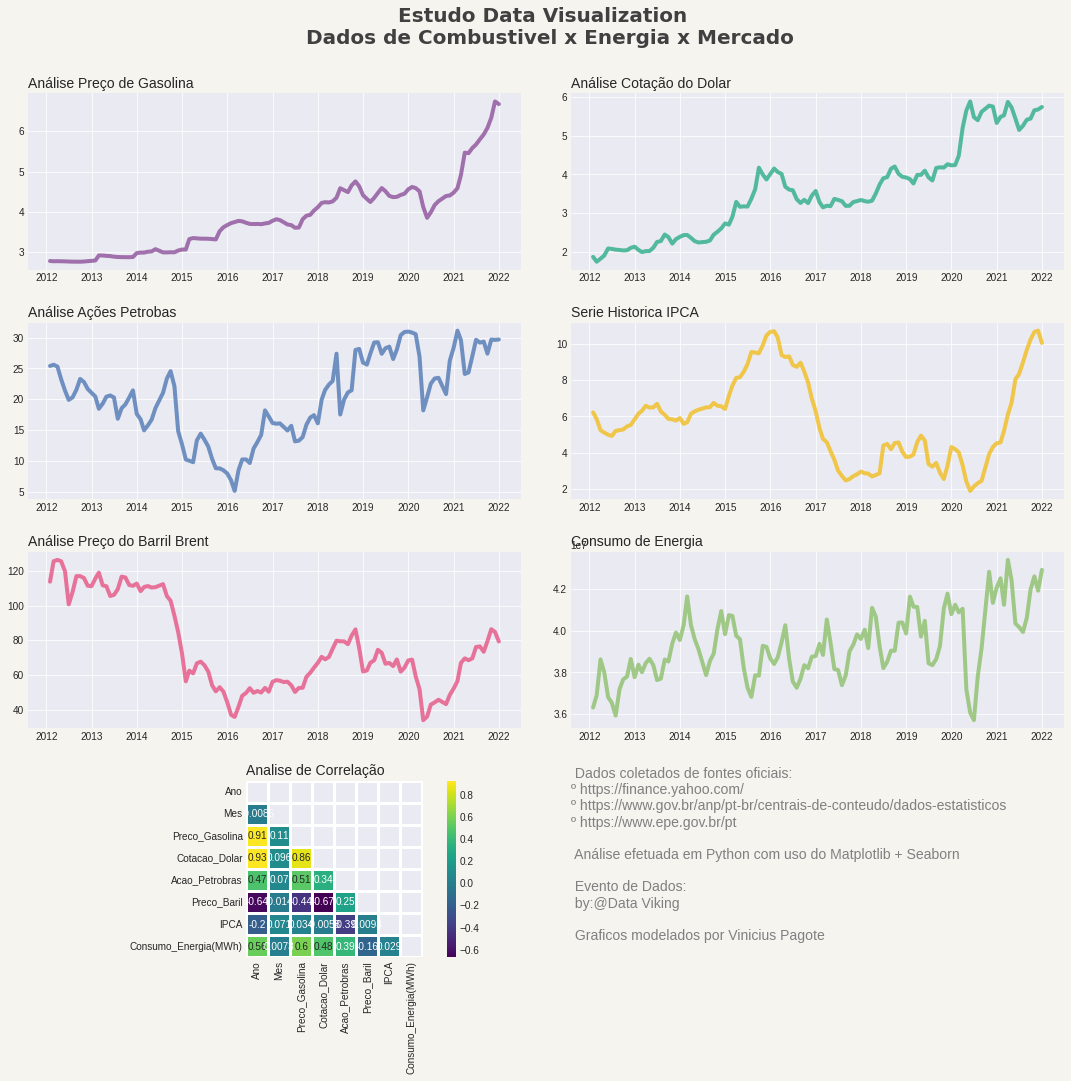

In [69]:
#Analise Geral
fig, ax = plt.subplots(figsize=(18,15))

#cor de fundo
Cor_Fundo = "#f5f4ef"
ax.set_facecolor(Cor_Fundo)
fig.set_facecolor(Cor_Fundo)

#Estilo
plt.style.use('seaborn-darkgrid')

#paletas de cores
Paleta = ["#7F3C8D", "#11A579", "#3969AC", "#F2B701", "#E73F74", "#80BA5A", "#E68310"]

#Linha, Coluna e a posição do seu grafico
plt.subplot(4, 2, 1)
plt.plot(Base_Dados['Data'], Base_Dados['Preco_Gasolina'], color=Paleta[0],linewidth=4,alpha=0.7)
plt.title('Análise Preço de Gasolina', loc='left', fontsize=14)

plt.subplot(4, 2, 2)
plt.plot(Base_Dados['Data'], Base_Dados['Cotacao_Dolar'], color=Paleta[1],linewidth=4,alpha=0.7)
plt.title('Análise Cotação do Dolar', loc='left', fontsize=14)

plt.subplot(4, 2, 3)
plt.plot(Base_Dados['Data'], Base_Dados['Acao_Petrobras'], color=Paleta[2],linewidth=4,alpha=0.7)
plt.title('Análise Ações Petrobas', loc='left', fontsize=14)

plt.subplot(4, 2, 4)
plt.plot(Base_Dados['Data'], Base_Dados['IPCA'], color=Paleta[3],linewidth=4,alpha=0.7)
plt.title('Serie Historica IPCA', loc='left', fontsize=14)

plt.subplot(4, 2, 5)
plt.plot(Base_Dados['Data'], Base_Dados['Preco_Baril'], color=Paleta[4],linewidth=4,alpha=0.7)
plt.title('Análise Preço do Barril Brent', loc='left', fontsize=14)

plt.subplot(4, 2, 6)
plt.plot(Base_Dados['Data'], Base_Dados['Consumo_Energia(MWh)'], color=Paleta[5],linewidth=4,alpha=0.7)
plt.title('Consumo de Energia', loc='left', fontsize=14)

plt.subplot(4, 2, 7)
plt.title('Analise de Correlação', loc='left', fontsize=14)
sns.heatmap(Correlacao, mask = Mascara, square = True, annot = True, linecolor = '#fff', linewidths=2,
                                 cbar = True, cmap='viridis')

plt.subplot(4, 2, 8).set_axis_off()

Texto = ' Dados coletados de fontes oficiais: \nº https://finance.yahoo.com/ \nº https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-estatisticos \nº https://www.epe.gov.br/pt'
Texto = Texto + '\n \n Análise efetuada em Python com uso do Matplotlib + Seaborn'
Texto = Texto + '\n \n Evento de Dados: \n by:@Data Viking'
Texto = Texto + '\n \n Graficos modelados por Vinicius Pagote'

plt.annotate(Texto,
             xy=(0,0.1), xycoords='axes fraction', ha='left', fontsize=14, color='gray')

# Ajuste nos graficos ( espaçamento )
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1, hspace=0.30)

plt.suptitle('Estudo Data Visualization \n Dados de Combustivel x Energia x Mercado', fontsize=20, color='#404040', fontfamily='KyivType Sans', fontweight='bold');

plt.savefig('Projeto.png')
